# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = pd.read_csv('Sequences.csv')

In [3]:
data.head()

,Sequence,Length,Solved
0,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,NaN
1,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,NaN
2,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,r4
3,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,NaN
4,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,NaN


In [4]:
data['Sequence'] = data['Sequence'].progress_apply(eval)

In [5]:
data['Sequence'][0]

[1,
 3,
 13,
 87,
 1053,
 28576,
 2141733,
 508147108,
 402135275365,
 1073376057490373,
 9700385489355970183,
 298434346895322960005291,
 31479360095907908092817694945,
 11474377948948020660089085281068730]

# Unit Sequences

In [6]:
def checkUnit(seq):
    return len(set(seq)) == 1

In [7]:
def predictNextTerm_Unit(seq):
    return seq[0]


Solved: 35 (0.02%)


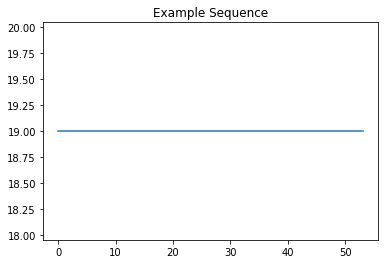

In [8]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    if checkUnit(seq):
        count += 1
        data.loc[i, 'Solved'] = 'un'
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [9]:
data.loc[data['Solved'] == 'bi', 'Solved'] = ''

In [10]:
data['Solved'].fillna('').value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

        91.68%
r4       1.11%
r3       1.08%
r5        0.8%
r2       0.78%
r6       0.67%
p2       0.57%
r7       0.44%
p3       0.34%
r8       0.33%
r9       0.33%
p4        0.3%
r10      0.27%
p1       0.25%
t-s       0.2%
p5       0.17%
p6       0.17%
t-p      0.15%
r1       0.08%
p7       0.08%
p8       0.07%
zz       0.04%
t-py     0.03%
p9       0.02%
t-d      0.02%
un       0.02%
p10       0.0%
Name: Solved, dtype: object

In [11]:
data.to_csv('Sequences.csv', index=False)